In [1]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)
#%cd "drive/MyDrive/Colab Notebooks"
#!pwd

import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

In [2]:
SECTION = "gan"
RUN_ID = "0002"
DATA_NAME = "whale"
RUN_FOLDER = "run/{}/".format(SECTION)
RUN_FOLDER += "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, "viz"))
    os.makedirs(os.path.join(RUN_FOLDER, "images"))
    os.makedirs(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [3]:
(x_train, y_train)  = load_safari(DATA_NAME)

In [4]:
x_train.shape

(80000, 28, 28, 1)

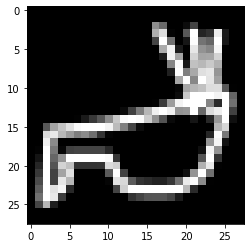

In [5]:
plt.imshow(x_train[200, :, :, 0], cmap="gray")

In [6]:
gan = GAN(input_dim = (28, 28, 1),
    discriminator_conv_filters=[64, 64, 128, 128],
    discriminator_conv_kernel_size=[5, 5, 5, 5],
    discriminator_conv_strides=[2, 2, 2, 1],
    discriminator_batch_norm_momentum= None,
    discriminator_activation="relu",
    discriminator_dropout_rate=0.4,
    discriminator_learning_rate=0.0008,
    generator_initial_dense_layer_size=(7, 7, 64),
    generator_upsample=[2, 2, 1, 1, 1, 1],
    #generator_upsample=[1, 1, 1, 1, 1, 2, 2],
    generator_conv_filters=[128, 128, 64, 64, 32, 1],
    #generator_conv_filters=[1, 16, 32, 64, 64, 128, 128],
    generator_conv_kernel_size=[5, 5, 5, 5, 5, 5, 5],
    generator_conv_strides=[1, 1, 1, 1, 1, 1, 1],
    generator_batch_norm_momentum=0.9,
    generator_activation="leaky_relu",
    generator_dropout_rate=None,
    generator_learning_rate=0.0004,
    optimizer="rmsprop",
    z_dim=100
)

if mode == "build":
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, "weights/weights.h5"))

In [7]:
gan.discriminator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [8]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

In [9]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [10]:
gan.train(
    x_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    run_folder=RUN_FOLDER,
    print_every_n_batches=PRINT_EVERY_N_BATCHES
)

0 [D loss: (1.335)(R 1.949, F 0.721)] [D acc: (0.164)(0.328, 0.000)] [G loss: 0.620] [G acc: 1.000]
1 [D loss: (0.390)(R 0.000, F 0.780)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.621] [G acc: 1.000]
2 [D loss: (0.348)(R 0.000, F 0.696)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.609] [G acc: 1.000]
3 [D loss: (0.348)(R 0.000, F 0.697)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.624] [G acc: 1.000]
4 [D loss: (0.346)(R 0.000, F 0.692)] [D acc: (0.898)(1.000, 0.797)] [G loss: 0.627] [G acc: 1.000]
5 [D loss: (0.346)(R 0.000, F 0.692)] [D acc: (0.938)(1.000, 0.875)] [G loss: 0.631] [G acc: 1.000]
6 [D loss: (0.347)(R 0.000, F 0.693)] [D acc: (0.805)(1.000, 0.609)] [G loss: 0.646] [G acc: 1.000]
7 [D loss: (0.345)(R 0.000, F 0.691)] [D acc: (0.953)(1.000, 0.906)] [G loss: 0.650] [G acc: 1.000]
8 [D loss: (0.345)(R 0.000, F 0.690)] [D acc: (0.984)(1.000, 0.969)] [G loss: 0.652] [G acc: 1.000]
9 [D loss: (0.345)(R 0.000, F 0.689)] [D acc: (0.992)(1.000, 0.984)] [G loss: 0.656] [G acc: 1.000]


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color="black", linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color="green", linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color="red", linewidth=0.25)
plt.plot([x[0] for x in gan.d_losses], color="orange", linewidth=0.25)

plt.xlabel("batch", fontsize=18)
plt.ylabel("loss", fontsize=16)

plt.xlim(0, 60)
plt.ylim(0, 1)

plt.show()

In [ ]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color="black", linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color="green", linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color="red", linewidth=0.25)
plt.plot([x[1] for x in gan.d_losses], color="orange", linewidth=0.25)

plt.xlabel("batch", fontsize=16)
plt.ylabel("accuracy", fontsize=16)

plt.xlim(0, 60)

plt.show()

In [ ]:
import numpy as np

figsize = 30
grid_size = 5
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
  ax = fig.add_subplot(grid_size, grid_size, i+1)
  ax.axis("off")
  ax.imshow(gan.generator(np.random.normal(0, 1, (1,gan.z_dim)))[0, :, :, 0], cmap="gray") 
plt.savefig("gan_camel.png", dpi=300)
plt.show()